## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 7 - 1 балл (за просрочку на сутки) = **6 баллов**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./data/homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [29]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [30]:
Y_train = df_train['f1']
X_train = df_train.drop('f1', axis=1, inplace=False)
Y_test = df_test['f1']
X_test = df_test.drop('f1', axis=1, inplace=False)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
# линейная регрессия
lin_regr = Pipeline(steps=[('#1', StandardScaler()), ('#2', LinearRegression())])
lin_regr.fit(X_train, Y_train)
lin_regr.score(X_test, Y_test)

0.47994089876103707

In [33]:
from sklearn.linear_model import Lasso

In [37]:
# ЛАССО
LASSO = Pipeline(steps=[('#1', StandardScaler()), ('#2', Lasso(alpha=0.01))])
LASSO.fit(X_train, Y_train)
LASSO.score(X_test, Y_test)

0.49152622319271877

#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [38]:
# линейная регрессия
print('All coefficients:', *lin_regr.named_steps['#2'].coef_, sep='\n', end='\n\n')
print('How many zero coefficients:', (lin_regr.named_steps['#2'].coef_ == 0).sum(), sep='\n')
print('Features with zero coefficients:',
      *X_train.columns.values[np.where(lin_regr.named_steps['#2'].coef_ == 0)] , sep='\n')

All coefficients:
0.9254701814452504
-0.02421687055276504
-0.053365200858255434
0.03172469627366158
0.1739214953433234
0.0019551238431899077

How many zero coefficients:
0
Features with zero coefficients:


In [39]:
# LASSO
print('All coefficients:', *LASSO.named_steps['#2'].coef_, sep='\n', end='\n\n')
print('How many zero coefficients:', (LASSO.named_steps['#2'].coef_ == 0).sum(), sep='\n', end='\n\n')
print('Features with zero coefficients:',
      *X_train.columns.values[np.where(LASSO.named_steps['#2'].coef_ == 0)] , sep='\n')

All coefficients:
0.9165494265002951
-0.014759306389935608
-0.042948851010287475
0.023927377147686103
0.16376442297045
0.0

How many zero coefficients:
1

Features with zero coefficients:
f6


#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

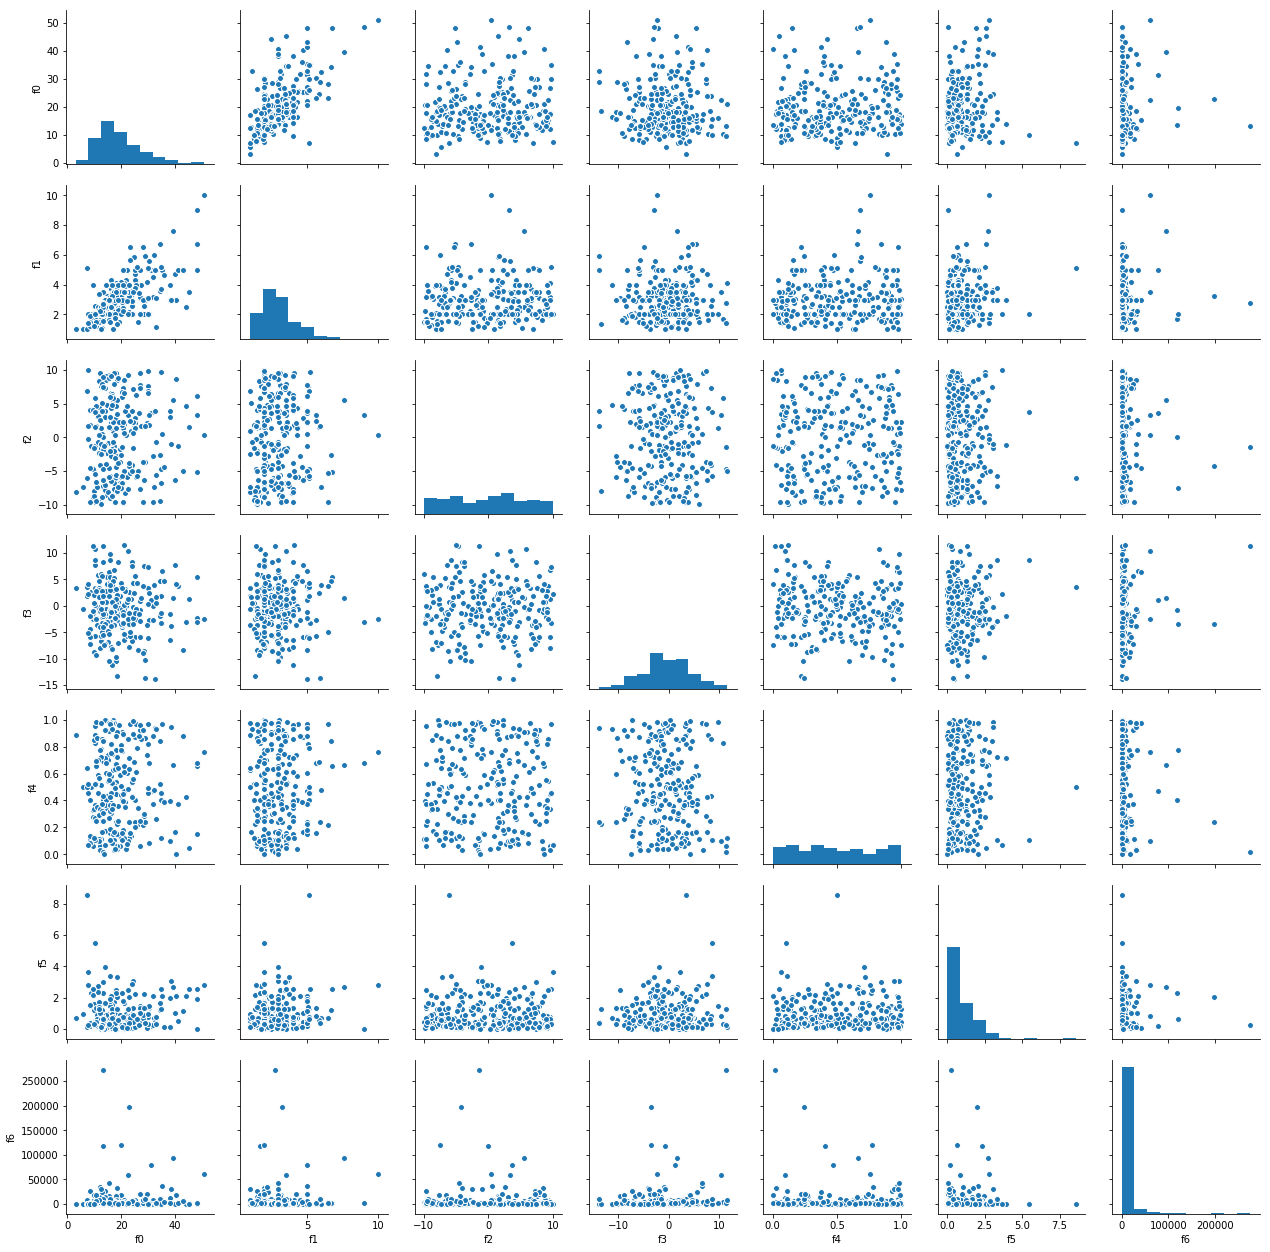

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.pairplot(df)

Видно, что у фичи с нулевым коэффициентом (f6) в методе ЛАССО c f1 не прослеживается линейная зависимость

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Я посчитала всё по формулам в лекциях 

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/12268127/ (ураа!)

In [116]:
from sklearn.base import BaseEstimator

class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if self.w0 is None:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = self.w0
        self.loss_history.append(self.calc_loss(X, y))
        i = 0
        momentum = np.zeros(X.shape[1])
        
        while (i < self.max_iter and (i == 0 or self.tolerance <= np.linalg.norm(self.w - w_prev))):
            if self.gd_type == 'full':
                gradient = self.calc_gradient(X, y)
            else:
                j = np.random.choice(np.arange(X.shape[0]), 1)
                gradient = self.calc_gradient(X[j], y[j])

            momentum = self.alpha * momentum + self.eta * gradient
            w_prev = self.w.copy()
            self.w -= momentum
            self.loss_history.append(self.calc_loss(X, y))
            i += 1
            if i == self.max_iter:
                print("¯\_(ツ)_/¯")

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        delta_y = y - np.dot(X,  self.w)
        in_range_i = np.where(np.absolute(delta_y) <= self.delta)
        else_range_i = np.where(np.absolute(delta_y) > self.delta)
        if in_range_i[0].shape[0] != 0:
            in_range_gradients = np.dot(-delta_y[in_range_i], X[in_range_i[0]])
        else:
            in_range_gradients = np.zeros(self.w.shape[0])
        if else_range_i[0].shape[0] != 0:
            else_range_gradients = np.dot(-np.sign(delta_y[else_range_i]) , X[else_range_i[0]]) * self.delta

        return ((in_range_gradients + else_range_gradients) / y.shape[0])
        

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        abs_delta_y = np.absolute(y - np.dot(X,  self.w))
        in_range_sum = ((1/2) * abs_delta_y[np.where(abs_delta_y <= self.delta)]**2).sum()
        else_range_sum = (self.delta * abs_delta_y[np.where(abs_delta_y > self.delta)] - (1/2) * self.delta**2).sum()

        return (in_range_sum + else_range_sum) / y.shape[0]
